<a href="https://colab.research.google.com/github/MeenTers/KKU_data_mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate Data

In [3]:
from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [7]:
X.shape

(300, 2)

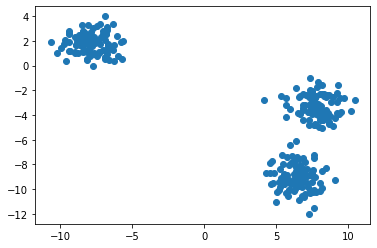

In [9]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

## Import

In [10]:
from sklearn.cluster import KMeans

##Define

In [19]:
KMclust = KMeans(n_clusters=5)

## Train

In [20]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [21]:
label = KMclust.predict(X)

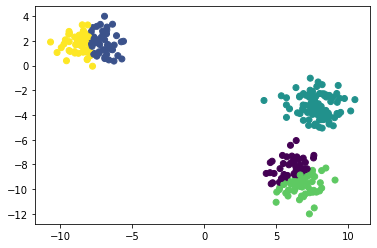

In [22]:
plt.scatter(X[:,0],X[:,1],c=label)

## Color quantization (application of kmean)

In [23]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM_material' 

Mounted at /content/drive


In [25]:
import cv2
import os

In [33]:
img = cv2.imread(os.path.join(path,'original.jpg'))
img

array([[[ 55, 104,  66],
        [ 56, 105,  67],
        [ 56, 104,  68],
        ...,
        [ 35,  49,  13],
        [ 37,  49,  13],
        [ 37,  49,  13]],

       [[ 55, 104,  66],
        [ 56, 105,  67],
        [ 56, 104,  68],
        ...,
        [ 33,  50,  13],
        [ 35,  49,  13],
        [ 37,  49,  13]],

       [[ 55, 104,  66],
        [ 56, 105,  67],
        [ 54, 105,  68],
        ...,
        [ 34,  51,  14],
        [ 34,  51,  14],
        [ 36,  50,  14]],

       ...,

       [[ 46,  49,  57],
        [ 42,  45,  53],
        [ 38,  41,  49],
        ...,
        [ 34,  90,  49],
        [ 34,  90,  49],
        [ 34,  90,  49]],

       [[ 40,  43,  51],
        [ 38,  41,  49],
        [ 36,  39,  47],
        ...,
        [ 34,  90,  49],
        [ 34,  90,  49],
        [ 34,  90,  49]],

       [[ 36,  39,  47],
        [ 35,  38,  46],
        [ 35,  38,  46],
        ...,
        [ 34,  90,  49],
        [ 34,  90,  49],
        [ 34,  90,  49]]

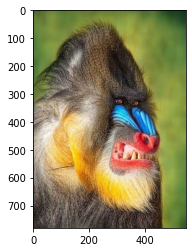

In [39]:
RGB_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [40]:
RGB_img.shape

(780, 547, 3)

##count unique colors

In [41]:
import numpy as np

In [42]:
np.unique(RGB_img).shape

(256,)

## Use K-mean to reduce colors from 256 colors to 8 colors

In [43]:
#Define
myQuantize = KMeans(n_clusters=8)


In [46]:
img_row = np.reshape(RGB_img,(780*547, 3))
img_row

array([[ 66, 104,  55],
       [ 67, 105,  56],
       [ 68, 104,  56],
       ...,
       [ 49,  90,  34],
       [ 49,  90,  34],
       [ 49,  90,  34]], dtype=uint8)

In [48]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
#Predict
res = myQuantize.predict(img_row)
res

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

## Get cluster centers

In [51]:
clus_cen = myQuantize.cluster_centers_
clus_cen

array([[230.67563202, 159.19582056,  63.43791819],
       [ 46.4122751 ,  38.51114597,  28.36769121],
       [145.47487554, 154.94195213,  68.05968381],
       [165.11855255, 142.45167541, 122.0423262 ],
       [ 88.79647249,  75.72067139,  57.96943721],
       [229.85107046, 204.37524423, 161.42352941],
       [ 49.77792805, 150.21625642, 206.59954017],
       [112.08155296, 122.27428864,  66.75433641]])

## Map color name back to image 

In [52]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [54]:
new_img_ = new_img/255

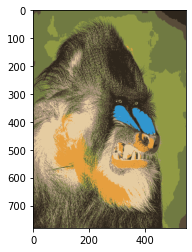

In [55]:
plt.imshow(new_img_)